In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
df.shape

(8124, 23)

In [61]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [62]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame(df)
label_encoder = LabelEncoder()
df=data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


<Axes: >

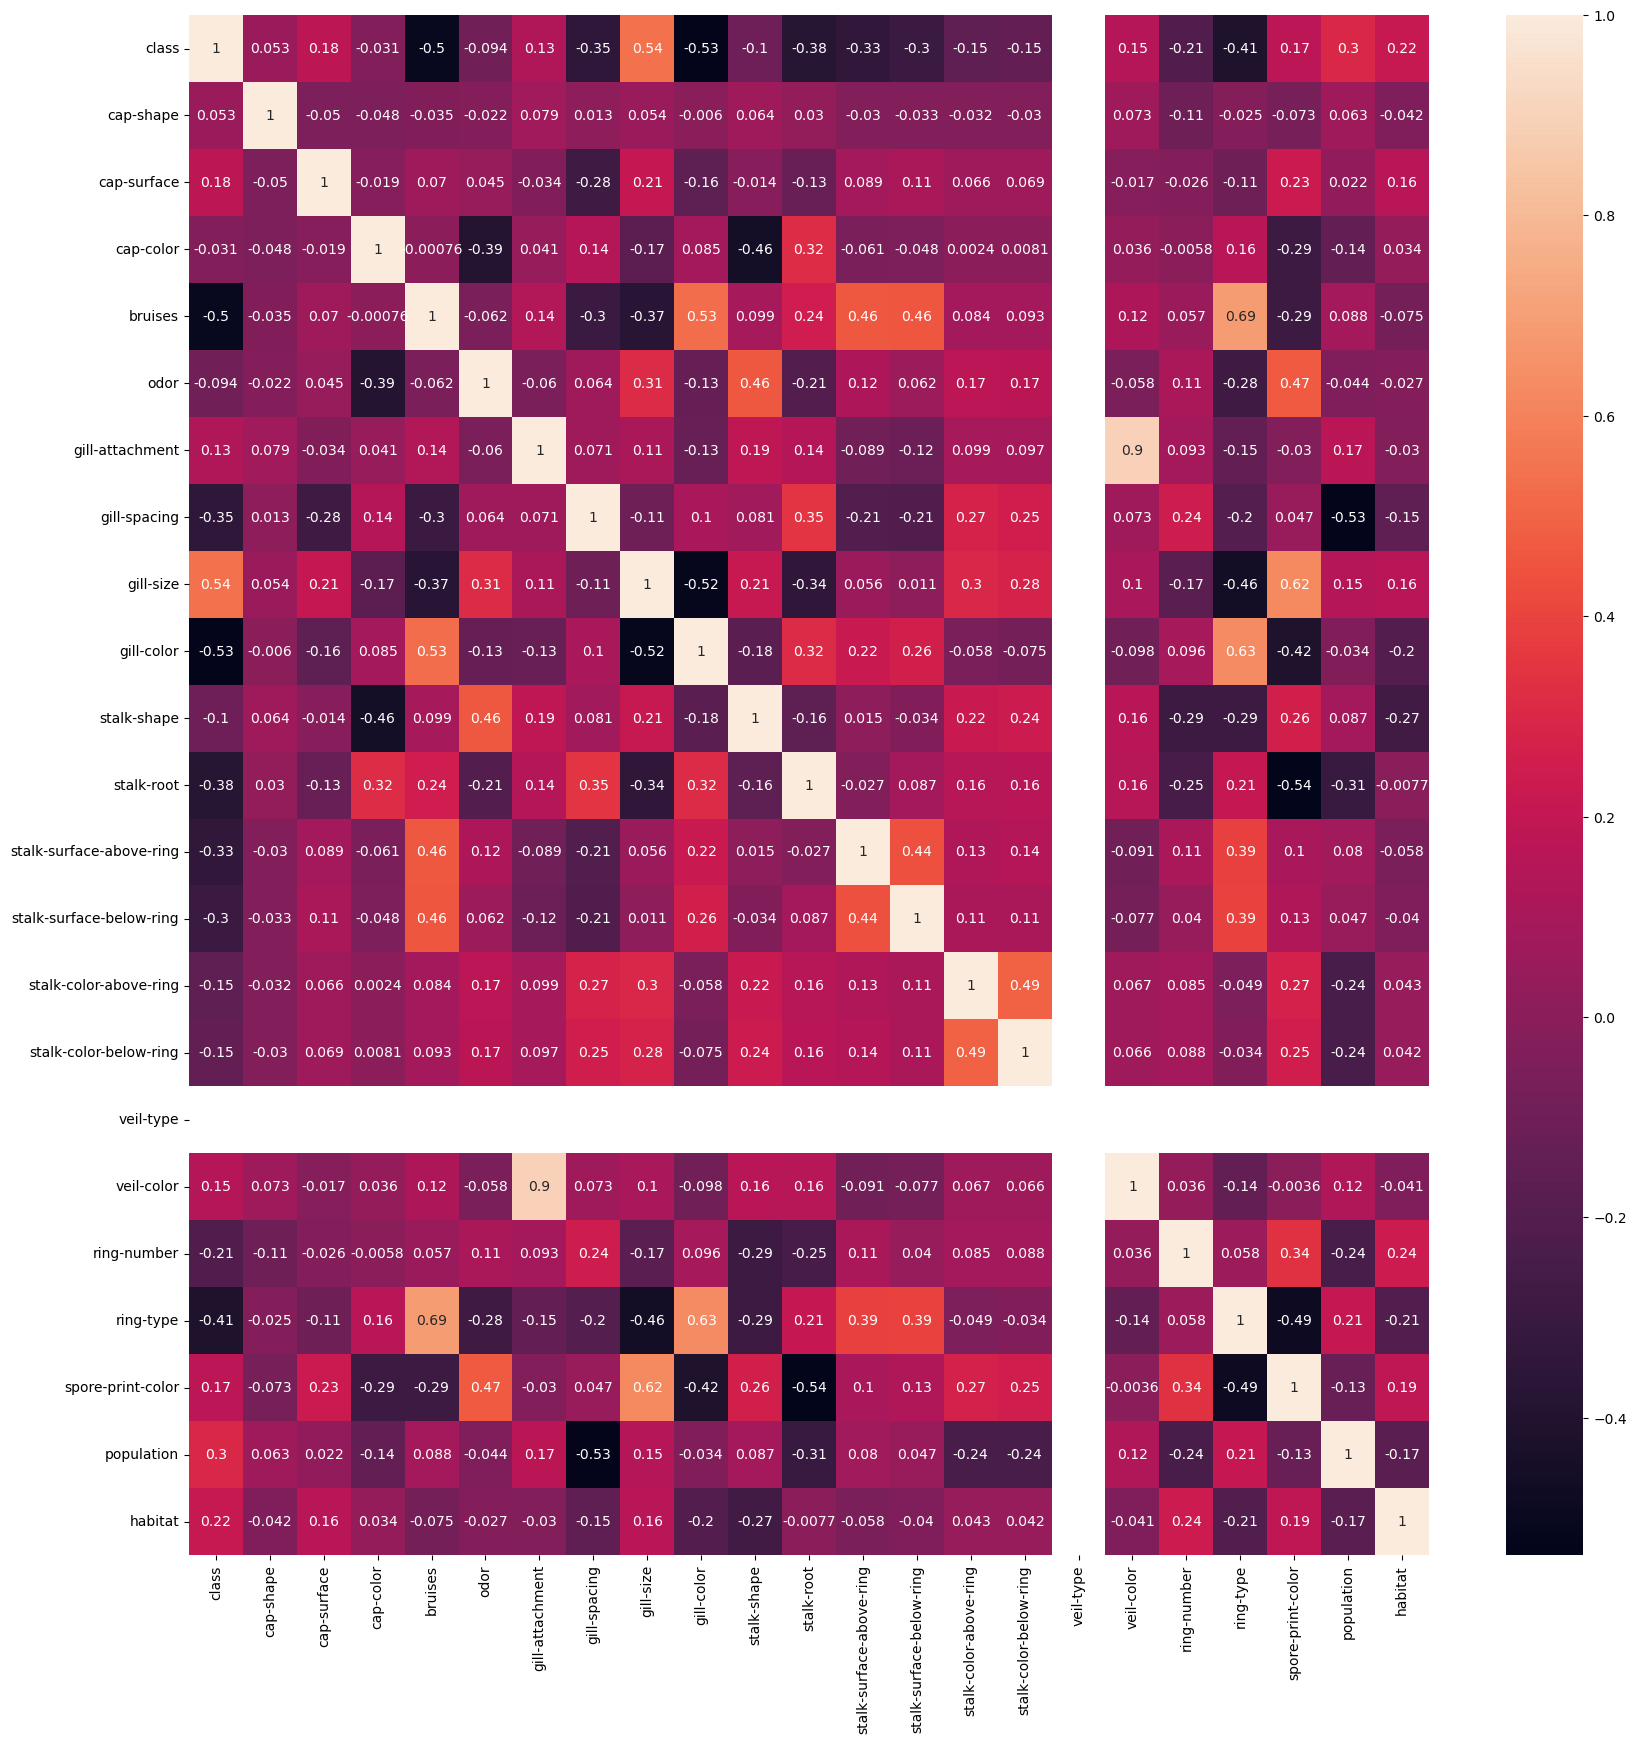

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [65]:
df= df.drop(columns=['veil-type','veil-color'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,3,2,2,7,7,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,0,2,2,5,5,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,0,2,2,5,5,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,0,2,2,5,5,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,0,2,1,7,7,1,0,7,4,2


<Axes: >

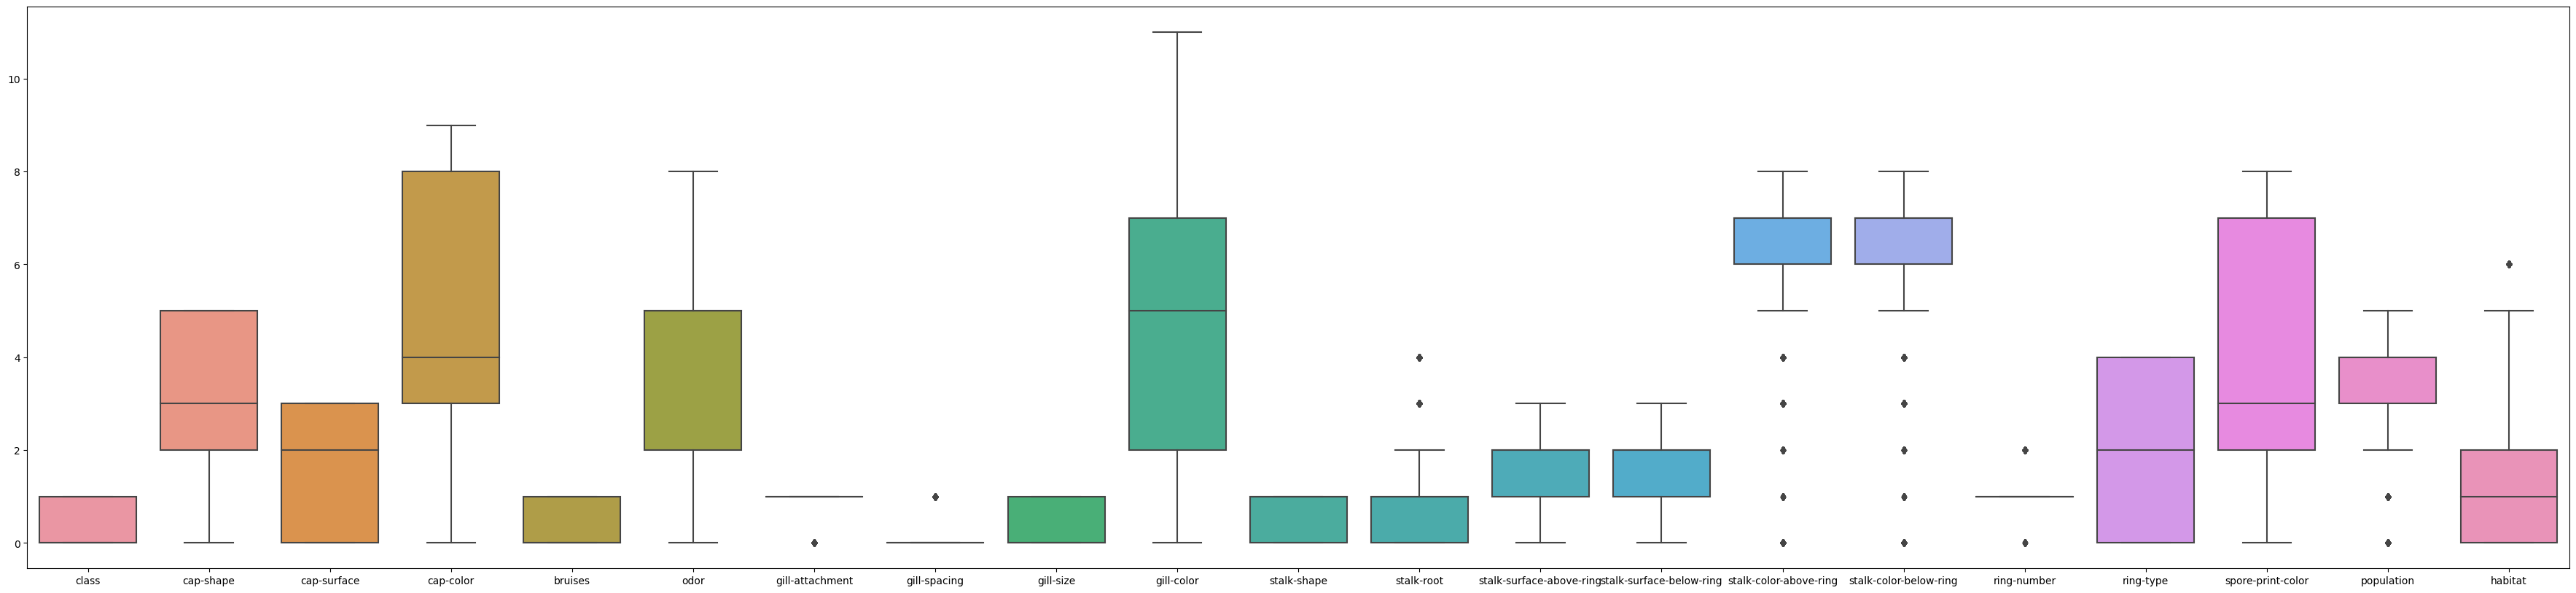

In [66]:
plt.figure(figsize = (45 , 10))
sns.boxplot(df)

#### Slicing into x and y

In [67]:
x=df.iloc[:,1:22].values
y=df.iloc[:,0].values

In [68]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state=0)

### 1) Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred1 = classifier1.predict(x_test)

In [71]:
df1= pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
df1

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,1,1
1623,0,0


In [72]:
cm = confusion_matrix (y_test,y_pred1)
print(cm)

[[819  33]
 [ 55 718]]


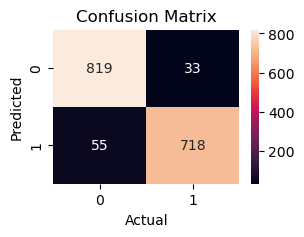

In [73]:
plt.figure(figsize=(3,2))
sns.heatmap(cm ,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [74]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       852
           1       0.96      0.93      0.94       773

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### 2)KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 25 ,metric= 'minkowski',p=2) 
classifier2 

KNeighborsClassifier(n_neighbors=25)

In [76]:
classifier2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [77]:
y_pred2 = classifier2.predict(x_test)
y_pred2

array([1, 0, 0, ..., 1, 0, 0])

In [78]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
df2

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,1,1
1623,0,0


In [79]:
cm = confusion_matrix (y_test,y_pred2)
print(cm)

[[849   3]
 [ 13 760]]


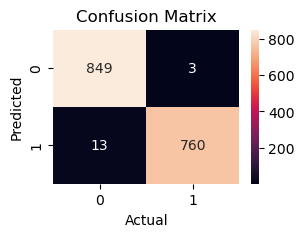

In [80]:
plt.figure(figsize=(3,2))
sns.heatmap(cm ,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [81]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       852
           1       1.00      0.98      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### 3) Naive Bayes Classifier

In [82]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(x_train,y_train)

GaussianNB()

In [83]:
y_pred3 = classifier3.predict(x_test)

In [84]:
cm = confusion_matrix (y_test,y_pred3)
print(cm)

[[824  28]
 [ 96 677]]


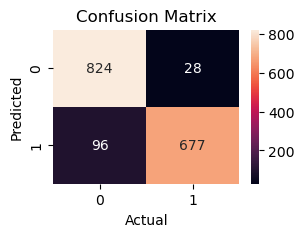

In [85]:
plt.figure(figsize=(3,2))
sns.heatmap(cm ,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [86]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       852
           1       0.96      0.88      0.92       773

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625



### 4)Decision tree Classifier

In [112]:
from  sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0 ,max_leaf_nodes = 12)
classifier4

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=12, random_state=0)

In [113]:
classifier4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=12, random_state=0)

In [114]:
y_pred4 = classifier4.predict(x_test)
y_pred4

array([1, 0, 0, ..., 1, 0, 0])

In [115]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[802  18]
 [ 50 755]]


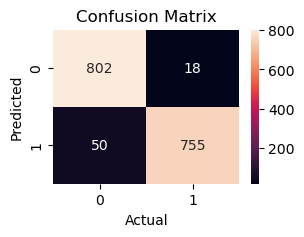

In [116]:
plt.figure(figsize=(3,2))
sns.heatmap(cm ,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [117]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [118]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

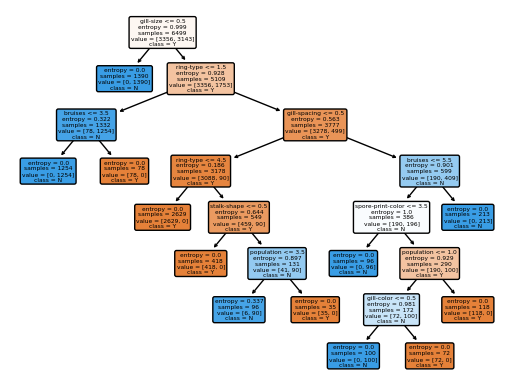

In [119]:
from sklearn import tree
dec_tree = tree.plot_tree(decision_tree = classifier4,feature_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 
        'bruises', 'odor','gill-attachment','gill-spacing','gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],class_names=['Y','N'],filled=True,rounded =True)

### 5) SVM 

In [121]:
from sklearn import svm
classifier5 = svm.SVC()
classifier5 

SVC()

In [123]:
classifier5.fit(x_train,y_train)

SVC()

In [125]:
y_pred5 = classifier5.predict(x_test)
y_pred5

array([1, 0, 0, ..., 1, 0, 0])

In [126]:
df5= pd.DataFrame({'Actual':y_test,'Predicted':y_pred5})
df5

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,1,1
1623,0,0


In [127]:
cm = confusion_matrix(y_pred5,y_test)
print(cm)

[[850  13]
 [  2 760]]


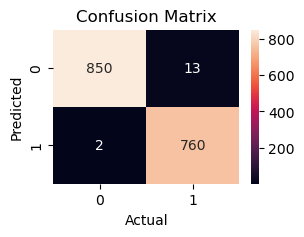

In [128]:
plt.figure(figsize=(3,2))
sns.heatmap(cm ,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [129]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       852
           1       1.00      0.98      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

